### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

In [2]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
import numpy as np
import matplotlib.pyplot as plt


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)

In [4]:
from sclibrary.ls_filter_design import LSFilterDesign

# frequencies
f = np.array(
    [0.28512429699931818305458364193328,
-0.88237789765813756659440514340531,
-1.3731352457670322753102709611994,
1.2467113677156391737810281483689,
-0.90497091048199007623509260156425,
0.72020108284209904958572678879136,
0.56279218322242341443484292540234,
-1.1828189377710074392524575159769,
1.3917637072266628717187586516957,
0.84253183742878834383560615606257]
    )


lsfilter = LSFilterDesign(sc=sc)

#### General filter form, L1 = L2 = L and α = β

Text(0.5, 1.0, 'Harmonic subcomponent error')

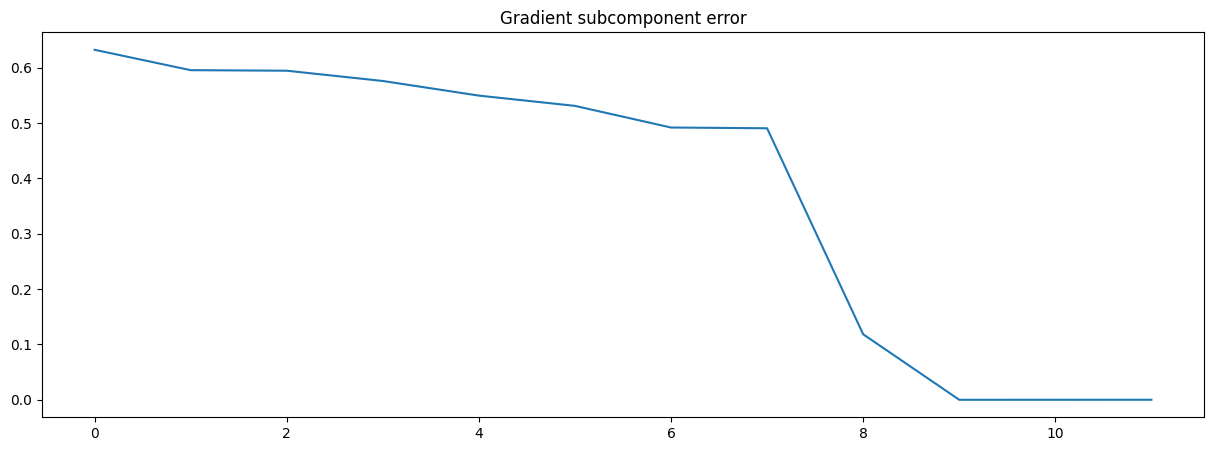

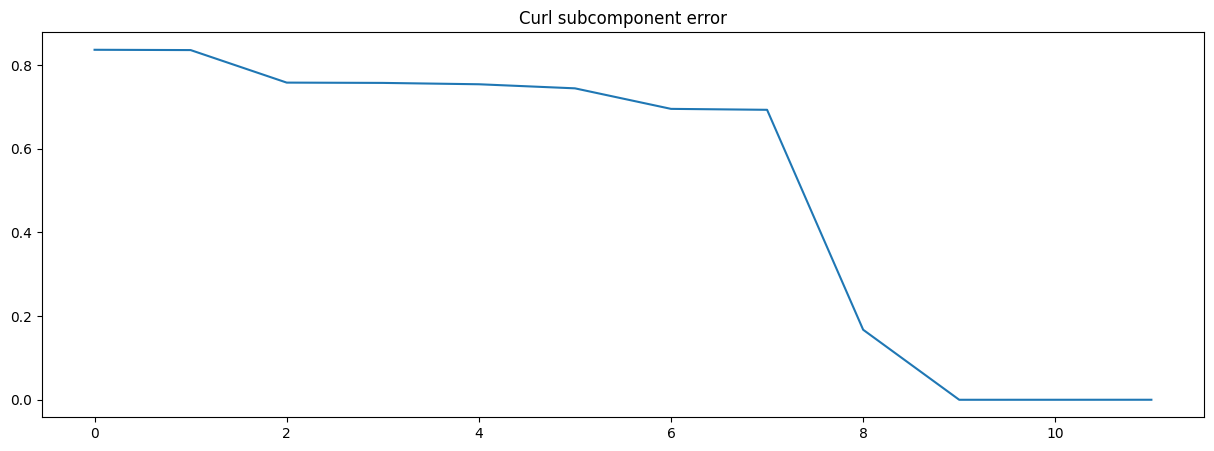

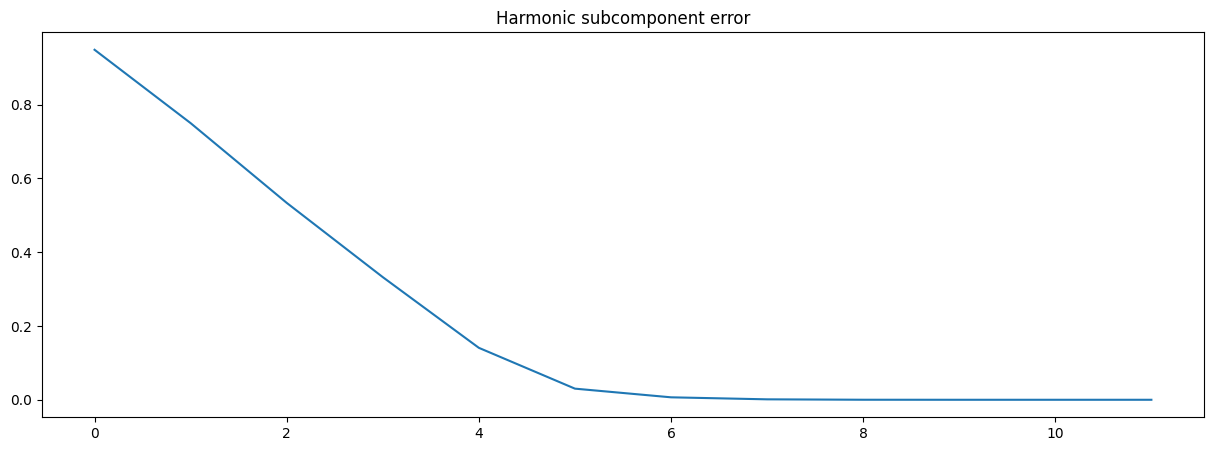

In [8]:
filter_range = range(12)


# gradient
lsfilter.general_filter(
    component="gradient", f=f, filter_range=filter_range
)
plt.figure(figsize=(15, 5))
plt.plot(filter_range, lsfilter.errors)
plt.title("Gradient subcomponent error")

# curl
lsfilter.general_filter(
    component="curl", f=f, filter_range=filter_range
)
plt.figure(figsize=(15, 5))
plt.plot(filter_range, lsfilter.errors)
plt.title("Curl subcomponent error")


# harmonic 
lsfilter.general_filter(
    component="harmonic", f=f, filter_range=filter_range
)
plt.figure(figsize=(15, 5))
plt.plot(filter_range, lsfilter.errors)
plt.title("Harmonic subcomponent error")

#### Subcomponent extraction

Text(0.5, 1.0, 'Curl subcomponent error')

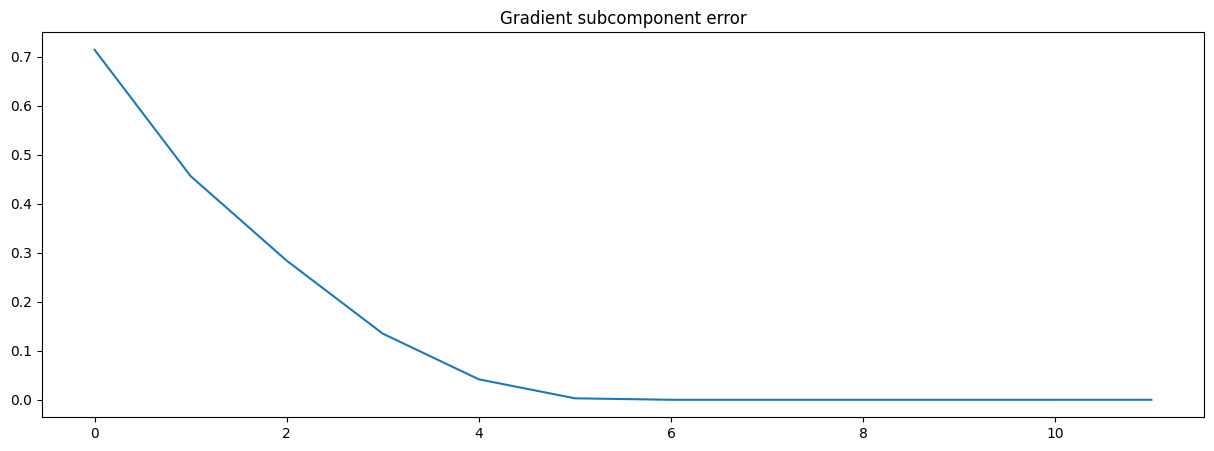

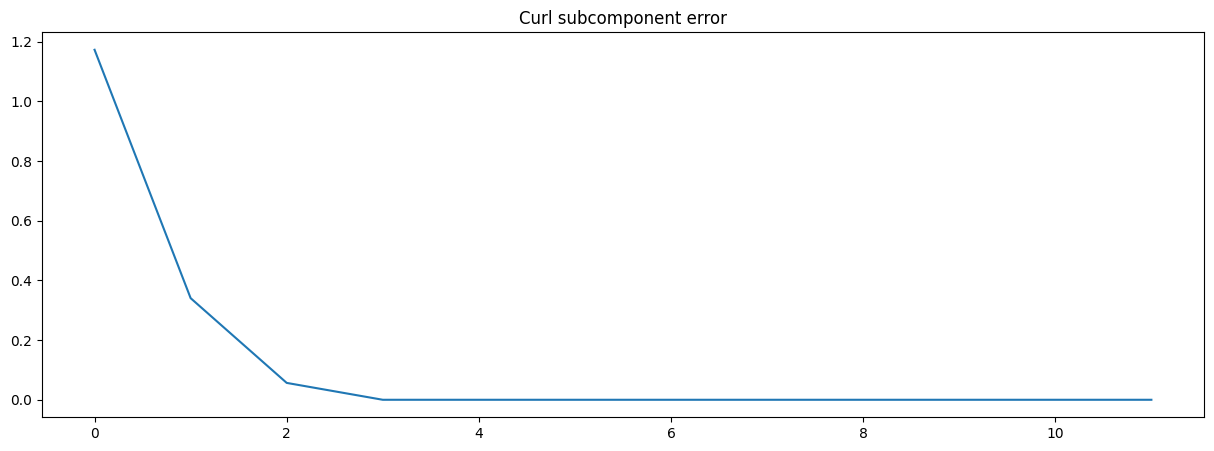

In [9]:
# gradient
lsfilter.subcomponent_extraction(
    component="gradient", f=f, filter_range=filter_range
)
plt.figure(figsize=(15, 5))
plt.plot(filter_range, lsfilter.errors)
plt.title("Gradient subcomponent error")

# curl
lsfilter.subcomponent_extraction(
    component="curl", f=f, filter_range=filter_range
)
plt.figure(figsize=(15, 5))
plt.plot(filter_range, lsfilter.errors)
plt.title("Curl subcomponent error")